In [123]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

In [124]:
def single_sim(population_size, payoff_matrix, graph):
    """
    Simulate one round of the game.
    """
    # simulate the game dynamics for 10 rounds

    for x in range(10):
        # iterate over edgges in graph & calculate the payoffs for each pairwise interaction based on the strategies in the payoff matrix

        for edge in graph.edges:
            node1, node2 = edge

            # Get the strategies of the interacting nodes
            strategy1 = graph.nodes[node1]["strategy"]
            strategy2 = graph.nodes[node2]["strategy"]

            # sort the strategies alphabetically
            sorted_strategies = sorted([strategy1, strategy2])

            # get the corresponding payoffs from the payoff matrix
            if (sorted_strategies[0], sorted_strategies[1]) not in payoff_matrix:
                continue
            
            payoff1, payoff2 = payoff_matrix[(sorted_strategies[0], sorted_strategies[1])]

            # update the payoffs of the nodes
            graph.nodes[node1]["payoff"] += payoff1
            graph.nodes[node2]["payoff"] += payoff2

        # update the strategies of the nodes based on their payoffs
        total_payoff = sum([graph.nodes[node]["payoff"] for node in graph.nodes])

        if population_size == 0:
            average_payoff = 0
        else:
            average_payoff = total_payoff / population_size

        for node in graph.nodes:
            # get current strategy of the node
            current_strategy = graph.nodes[node]["strategy"]

            # get the payoff of the node
            node_payoff = graph.nodes[node]["payoff"]

            # calculate the fitess of the current strategy
            if average_payoff == 0:
                fitness = 0
            else:
                fitness = node_payoff / average_payoff

            # update strategy based on neighboring nodes 
            new_strategy = current_strategy # initialize with current strategy

            for neighbor in graph.neighbors(node):
                # get payoff of neighbor
                neighbor_payoff = graph.nodes[neighbor]["payoff"]

                # get strategy of neighbor
                neighbor_strategy = graph.nodes[neighbor]["strategy"]

                # get fitness of neighbor
                if average_payoff == 0:
                    neighbor_fitness = 0
                else:
                    neighbor_fitness = neighbor_payoff / average_payoff

                # if TI-UI, change them to whichever payoff is higher
                if current_strategy == "TI" and neighbor_strategy == "UI" or current_strategy == "UI" and neighbor_strategy == "TI":
                    if neighbor_fitness > fitness:
                        new_strategy = neighbor_strategy
                    else: 
                        new_strategy = current_strategy

                # if TR-UR, change them to whichever payoff is higher
                if current_strategy == "TR" and neighbor_strategy == "UR" or current_strategy == "UR" and neighbor_strategy == "TR":
                    if neighbor_fitness > fitness:
                        new_strategy = neighbor_strategy
                    else: 
                        new_strategy = current_strategy
            
            # update the strategy of the node
            graph.nodes[node]["strategy"] = new_strategy

In [125]:
def create_graph(population_size):
    graph = nx.Graph()
    graph.add_nodes_from(range(population_size))

    # randomly assign strategies to the individuals (even distribution)
    strategies = ["UI"] * (population_size // 4) + ["TI"] * (population_size // 4) + ["TR"] * (population_size // 4) + ["UR"] * (population_size // 4)
    random.shuffle(strategies)

    # assign strategies to the nodes in the graph
    for node, strategy in zip(graph.nodes, strategies):
        graph.nodes[node]["strategy"] = str(strategy)

    # assign initial payoffs 
    for node in graph.nodes:
        graph.nodes[node]["payoff"] = 0

    # create edges between all nodes
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            if node1 != node2:
                graph.add_edge(node1, node2)

    return graph

In [126]:
def create_payoff(R=5, B=3, L=6, N=1, S=1):
    # trustworthy initiator, trustworthy recipient, untrustworthy initiator, untrustworthy recipient
    payoff_matrix = {
        ("TI", "TR"): (R, R),
        ("TR", "UI"): (-L, R+B),
        ("TI", "UR"): (-N-S, -N),
        ("UI", "UR"): (-N, -N),
    }
    return payoff_matrix

In [127]:
def display_graph(graph):
    # Create a list of colors corresponding to the strategies
    strategy_colors = {
        "TI": "green",
        "UI": "blue",
        "TR": "red",
        "UR": "yellow",
    }
    node_colors = [strategy_colors[graph.nodes[node]["strategy"]] for node in graph.nodes]

    fig, ax = plt.subplots()

    # Draw the graph
    nx.draw(graph, node_color=node_colors, with_labels=True)

    # Show the plot
    plt.show()


In [128]:
def extract_frequencies(graph):
    """
    Extract the frequencies of each strategy in the graph.
    """
    # initialize frequencies
    frequencies = {
        "TI": 0,
        "UI": 0,
        "TR": 0,
        "UR": 0,
    }

    # iterate over nodes in the graph and update the frequencies
    for node in graph.nodes:
        strategy = graph.nodes[node]["strategy"]
        frequencies[strategy] += 1

    return frequencies

In [129]:
def display_frequencies(frequencies):
    frq = np.array(list(frequencies.values()))

    # create bar plot 
    plt.bar(frequencies.keys(), frq)

    # display values on top of bars
    for i, v in enumerate(frq):
        plt.text(i, v, str(v), ha="center")
    
    # set title and labels
    plt.title("Frequencies of Strategies")
    plt.xlabel("Strategy")
    plt.ylabel("Frequency")
    
    # show plot
    plt.show()

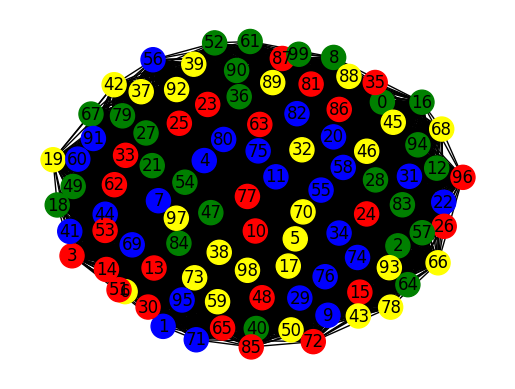

In [130]:
# generate one graph simulation 
payoff_matrix = create_payoff()
graph = create_graph(100)

# display initial graph 
display_graph(graph)


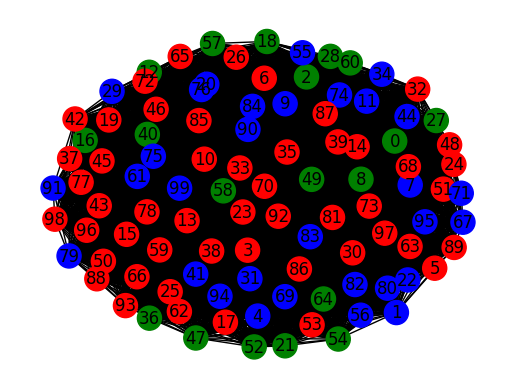

In [131]:
# simulate one round of the game
single_sim(100, payoff_matrix, graph)

display_graph(graph)

{'TI': 19, 'UI': 31, 'TR': 50, 'UR': 0}


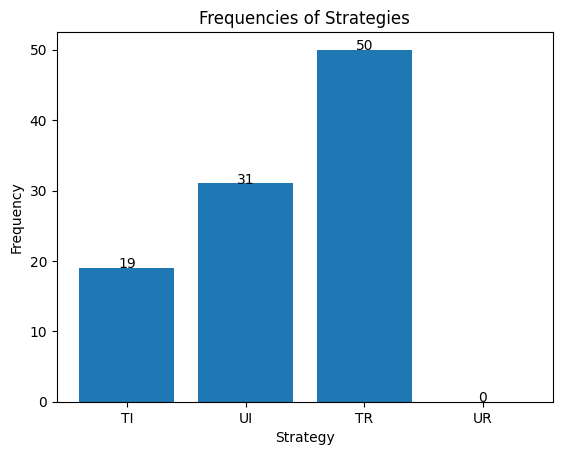

In [132]:
# extract frequencies
frequencies = extract_frequencies(graph)
print(frequencies)

# display frequencies
display_frequencies(frequencies)

In [139]:
# B = np.array([i for i in range(-10, 11)])

B = np.array([])

i = -7.5
while i <= 7.5:
    B = np.append(B, i)
    i += 0.5

TI = np.array([])
UI = np.array([])
TR = np.array([])
UR = np.array([])

for b in B:
    payoff_matrix = create_payoff(b)
    graph = create_graph(400)
    single_sim(1000, payoff_matrix, graph)
    frequencies = extract_frequencies(graph)
    TI = np.append(TI, frequencies["TI"])
    UI = np.append(UI, frequencies["UI"])
    TR = np.append(TR, frequencies["TR"])
    UR = np.append(UR, frequencies["UR"])

print(B)
print(TI)
print(UI)
print(TR)
print(UR)

[-7.5 -7.  -6.5 -6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.
 -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5]
[200. 200. 200. 200. 178. 134. 145. 121.  99.  77. 118. 143. 126. 148.
 150. 154. 167. 119. 181. 113. 117.  73.  69.  68.  80.  71.  73.  71.
  76.  66.  77.]
[  0.   0.   0.   0.  22.  66.  55.  79. 101. 123.  82.  57.  74.  52.
  50.  46.  33.  81.  19.  87.  83. 127. 131. 132. 120. 129. 127. 129.
 124. 134. 123.]
[200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 156. 111.  64.  44.
  45.  29.  36.  13.  13.  11.   0. 197. 200. 200. 200. 200. 200. 200.
 200. 200. 200.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  44.  89. 136. 156.
 155. 171. 164. 187. 187. 189. 200.   3.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]


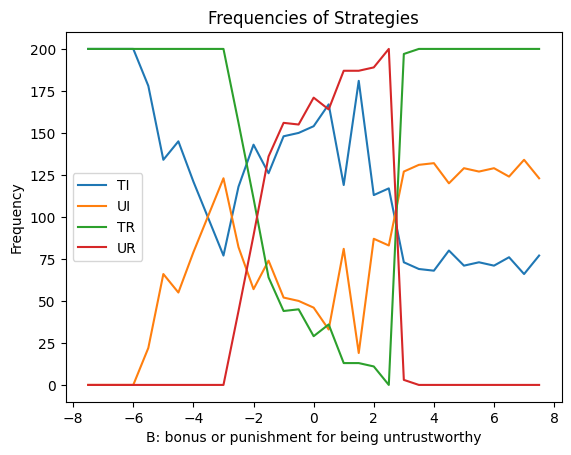

In [141]:
plt.plot(B, TI, label="TI")
plt.plot(B, UI, label="UI")
plt.plot(B, TR, label="TR")
plt.plot(B, UR, label="UR")
plt.title("Frequencies of Strategies")
plt.ylabel("Frequency")
plt.xlabel("B: bonus or punishment for being untrustworthy")
plt.legend()
plt.show()